# Problem Set 1 - NYC Flights and Weather Dataset

## About the Problem Set: 

I have used use python and pandas to analyze the nycflights13 data 

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. 

In [3]:
%config IPCompleter.greedy=True

In [5]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       6.5.0 (need at least 1.0)
Numpy version:        1.15.4 (need at least 1.7.1)
SciPy version:         1.1.0 (need at least 0.12.0)
Pandas version:       0.23.4 (need at least 0.11.0)
Mapltolib version:     2.2.3 (need at least 1.2.1)
Scikit-Learn version: 0.19.2 (need at least 0.13.1)


In [107]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
path = os.getcwd()
print(path)
flights_df= pd.read_csv(r'C:\Users\Amit Manghwani\Desktop\IMT 574\Problem sets/flights.csv.bz2')

C:\Users\Amit Manghwani\Desktop\IMT 574\Problem sets


In [108]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)


(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [110]:
## print the first and last few lines of the data
print("head\n", flights_df.head(20))
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())


head
     Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0            1  2013      1    1     517.0        2.0     830.0       11.0   
1            2  2013      1    1     533.0        4.0     850.0       20.0   
2            3  2013      1    1     542.0        2.0     923.0       33.0   
3            4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4            5  2013      1    1     554.0       -6.0     812.0      -25.0   
5            6  2013      1    1     554.0       -4.0     740.0       12.0   
6            7  2013      1    1     555.0       -5.0     913.0       19.0   
7            8  2013      1    1     557.0       -3.0     709.0      -14.0   
8            9  2013      1    1     557.0       -3.0     838.0       -8.0   
9           10  2013      1    1     558.0       -2.0     753.0        8.0   
10          11  2013      1    1     558.0       -2.0     849.0       -2.0   
11          12  2013      1    1     558.0       -2.0     

## Some Tips

* This assignment involves extensive Data frame splitting and
  aggregation. You should look into the details of the methods
  groupby, transform, sum, count, mean etc 
* Many of the tasks in the assignment can be done either through the
  Pandas Data Frame or by converting the data frames to Series. Many
  of the methods in the numpy are applicable to Series only. When
  stuck, try to explore the type of object (Pandas Data Frame or Numpy
  Series) you are dealing with. 

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)


How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [113]:
flights_df = pd.DataFrame(flights_df)
print(len(flights_df))

336776


In [114]:
flights_df.origin
#Checking count of the flights from each of the airports in NYC by using the origin column 
print(flights_df['origin'].value_counts())


EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64


In [115]:
#checking year of the data
flights_df['year'].value_counts()

2013    336776
Name: year, dtype: int64

In [14]:
# checking flights from JFK, EWR and LGA that depart to LA.
nyc_LA = flights_df[(flights_df['origin'].isin(['JFK','LGA','EWR']) & (flights_df['dest']=='LAX'))]
len(nyc_LA)


16174

### Total flights from NYC airports to Los Angeles International Airport (LAX) in 2013 were 16174

### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [116]:
# Your code here
# Check number of flights for each airline
print(nyc_LA['carrier'].value_counts())


UA    5823
AA    3582
VX    2580
DL    2501
B6    1688
Name: carrier, dtype: int64


### Highest Flights are by UA (United Airlines) 5823
### Lowest are by B6 (JetBlue) 1688

### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [117]:
# Your code here
print(len(nyc_LA['tailnum'].unique()))

992


### 992 unique planes fly from NYC to LAX.

### (d)

What is the average arrival delay for flights from NYC to LAX?

In [118]:
nyc_LA.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
12,13,2013,1,1,558.0,-2.0,924.0,7.0,UA,N29129,194,JFK,LAX,345.0,2475,5.0,58.0
37,38,2013,1,1,628.0,-2.0,1016.0,29.0,UA,N33289,1665,EWR,LAX,366.0,2454,6.0,28.0
63,64,2013,1,1,658.0,-2.0,1027.0,2.0,VX,N627VA,399,JFK,LAX,361.0,2475,6.0,58.0
69,70,2013,1,1,702.0,2.0,1058.0,44.0,B6,N779JB,671,JFK,LAX,381.0,2475,7.0,2.0
91,92,2013,1,1,743.0,13.0,1107.0,7.0,AA,N338AA,33,JFK,LAX,358.0,2475,7.0,43.0


In [119]:
# mean delay of arrivals from NYC to LAX
print(nyc_LA['arr_delay'].mean())

0.5471109447148383


### Average delay of arrivals from NYC to LAX is 0.547 mins

### (e)

What proportion of flights to LAX come from each NYC airport?

In [120]:
#assigning a new dataframe with the number of flights grouped byof the nyc_LA dataframe
prop = pd.DataFrame(nyc_LA.groupby('origin')['origin'].count())
#print(prop)
# Renaming column name to count of flights
prop.columns = ['Count'] 
# Sum of flights
sum = prop.sum()
#sum
#using lambda function to find percentage flights divided by the total flights 
prop['Proportion'] = prop.apply(lambda count: 100*count/float(count.sum())) 
prop

,Count,Proportion
origin,,
EWR,4912,30.369729
JFK,11262,69.630271


### There are no flights to LA from LGA airport.
### 30.36% flights come from EWR and 69.63% come from JFK 


In [121]:
#code adapted from https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [122]:
#We need to group by date and then find the respective average delays. 
#For that, we will combine 3 columns :year,month and day to a single 'date' column

flights_df['date'] = flights_df['year'].astype(str) + "-" + flights_df['month'].astype(str) + "-" + flights_df['day'].astype(str)

#finding avg dep delay by mean
avg_dep_delay_by_date = pd.DataFrame(flights_df.groupby('date').dep_delay.mean())
avg_dep_delay_by_date
#sorting to descending order to find the largest delay

largest_dep_delay=avg_dep_delay_by_date.sort_values(['dep_delay'], ascending = False, na_position='last')['dep_delay'].head(1)
print(largest_dep_delay)


date
2013-3-8    83.536921
Name: dep_delay, dtype: float64


### Largest average departure delay is  83.53 mins on 8th of March.

In [123]:
#Similarly finding avg arr delay by mean
avg_arr_delay_by_date = pd.DataFrame(flights_df.groupby('date').arr_delay.mean())
#sorting to descending order to find the largest delay

largest_arr_delay=avg_arr_delay_by_date.sort_values(['arr_delay'], ascending = False, na_position='last')['arr_delay'].head(1)
print(largest_arr_delay)

date
2013-3-8    85.862155
Name: arr_delay, dtype: float64


### Largest average arrival delay is 85.86 mins on 8th of March.

### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

### As a traveller, the worst or best day would depend on the probability of my flight departing late on a given day
### We need to find out the highest percentage of flights departing late on a given day.
### My assumption is I dislike only late arriving flights. Late Departure doesn't always means that the flight is late.

In [141]:
# Finding positive arrival delays
pos_arr_delay = flights_df[flights_df['arr_delay']>0]
pos_arr_delay.head(10)
#finding largest avg arrival delay on a given day
#pos_arr_delay.sort_values(['arr_delay'], ascending = False)['arr_delay'].head(10)
pos_avg_arr_delay_by_date = pd.DataFrame(pos_arr_delay.groupby('date').arr_delay.mean())
pos_avg_arr_delay_by_date

pos_avg_arr_delay_by_date.sort_values(['arr_delay'], ascending = False)['arr_delay'].head(1)



date
2013-7-10    110.093439
Name: arr_delay, dtype: float64

### Highest avg positive arrival delay is on 10th July. I have assumed only positive arrival delays and its count.  

In [140]:
# Finding negative delays for best day
#least_arr_delay = flights_df[flights_df['arr_delay']<0]
#finding largest avg arrival delay on a given day
#least_arr_delay.sort_values(['arr_delay'], ascending = True)['arr_delay'].head(1)
#lowest_avg_arr_delay_by_date = pd.DataFrame(least_arr_delay.groupby('date').arr_delay.mean())
#pos_avg_arr_delay_by_date
#lowest_avg_arr_delay_by_date.sort_values(['arr_delay'], ascending = True)['arr_delay'].head(10)


least_arr_delay = pd.DataFrame(flights_df.groupby('date').arr_delay.mean())
least_arr_delay.sort_values(['arr_delay'], ascending = True).head(1)

,arr_delay
date,
2013-9-7,-20.349854


### 7th September has the least average arrival delay which implies that the flights are landing around 20.35 mins early. Based on that we can say it is the best day to fly.


### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [142]:
flights_df.head()
mean_dep_delay_airline = pd.DataFrame(flights_df.groupby('carrier').mean()['dep_delay'])
#print(mean_dep_delay)
print(mean_dep_delay_airline.sort_values(['dep_delay'], ascending = False, na_position='last')['dep_delay'].head(1))

print(mean_dep_delay_airline.sort_values(['dep_delay'], ascending = False, na_position='last')['dep_delay'].tail(1))

#count_airline= pd.DataFrame(flights_df.groupby('carrier').count())
#print(count_airline)
#print(flights_df['carrier'].value_counts())


carrier
F9    20.215543
Name: dep_delay, dtype: float64
carrier
US    3.782418
Name: dep_delay, dtype: float64


### F9 has the highest departure delay 20.21 mins and US has the lowest delay. 

### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

### My approach is find if there are any monthly patterns for the average postive departure delays.
### Also, it would be interesting to see the count of the flights with positive departure delays.

Text(0.5,1,'Average Departure Delay by Month (in mins)')

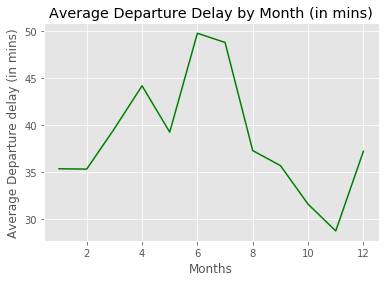

In [52]:
# Seasonal Patterns by Month (Positive Departure delay in mins)

#new df for positive departure delays
pos_dep_delay = flights_df[flights_df['dep_delay']>0]
#pos_dep_delay.head()
plt.style.use('ggplot')
plt.plot(pos_dep_delay.groupby('month')['dep_delay'].mean(), color="green")
plt.xlabel('Months')
plt.ylabel('Average Departure delay (in mins)')
plt.title('Average Departure Delay by Month (in mins)')
#plt.show()

Text(0.5,1,'Count of Delayed Flights by Month')

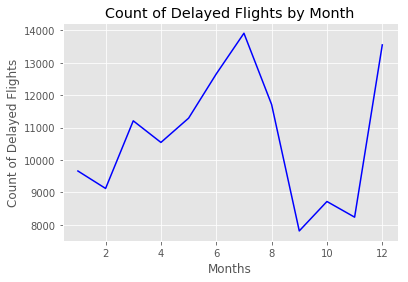

In [47]:
#Seasonal Patterns by Count of the positive delays of flights 
plt.plot(pos_dep_delay.groupby('month')['dep_delay'].count(), color="blue")
plt.xlabel('Months')
plt.ylabel('Count of Delayed Flights')
plt.title('Count of Delayed Flights by Month')
#plt.show()

### Both the graphs have similar monthly patterns. As the count of flights increase, the delay increases as well.

### (e)

On average, how do departure delays vary over the course of a day?

### Approach is to group by hour and find the mean and count of delays by hour of the day.
### I have assumed all departure delays just to check if flights are early at ny time of the day.

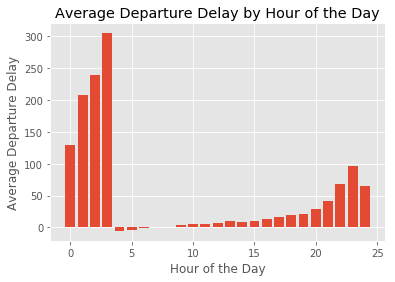

In [57]:
#Departure Delay grouped by hour of the day
dep_delay_hour = pd.DataFrame(flights_df.groupby('hour').mean()['dep_delay'])

fig, ax = plt.subplots()
plt.bar(range(25), dep_delay_hour.dep_delay)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Departure Delay')
plt.title('Average Departure Delay by Hour of the Day')
plt.show()

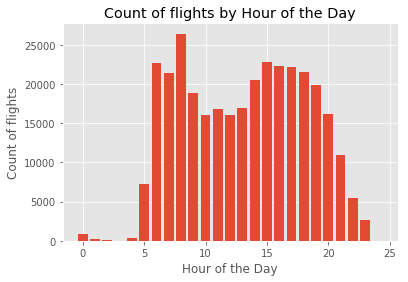

In [56]:
dep_delay_hour_count = pd.DataFrame(flights_df.groupby('hour').count()['dep_delay'])
#Count of Flights grouped by hour of the day 
fig, ax = plt.subplots()
plt.bar(range(25), dep_delay_hour_count.dep_delay)
plt.xlabel('Hour of the Day')
plt.ylabel('Count of flights')
plt.title('Count of flights by Hour of the Day')
plt.show()


### It is interesting to see that average departure delay for the early morning flights (12am to 4am) is high.
### The count of flights is low from 12-4am. So may be the delay is caused by other factors related to weather or visibility.
### And there is zero or a negative delay from 4am to 8am even though the count of the flights is high during those hours. 

## Question 3

Which flight departing NYC in 2013 flew the fastest?

Note: compute the speed as distance/time.

In [242]:
# Speed is equal to 
flights_df.head()
flights_df['speed_in_mph'] = flights_df.distance/(flights_df.air_time/60)
flights_df.sort_values('speed_in_mph',ascending = False).head(1)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,speed_in_mph
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,2013-5-25,703.384615


### Flight number 1499 Delta airlines from LGA to ATL flew the fastest on 25th May. The avg speed was 703.38 miles per hour.

## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

### Here, the approach would be to concatenate all 3 columns into one single column "flight_details" to display the results

In [59]:
# 
flights_df['flight_details'] = flights_df['carrier'].astype(str) + ' ' + flights_df['flight'].astype(str) + ' ' + flights_df['dest'].astype(str)
flights_df.head()

flights_details_by_count= pd.DataFrame(flights_df.groupby(['flight_details','carrier','flight','dest']).flight.count())
flights_details_by_count.head()
flights_details_by_count[flights_details_by_count['flight']==365]
#Finding all the flights that flew on all the days
#fl_rep[fl_rep['flight'] == 365]


,,,,flight
flight_details,carrier,flight,dest,
AA 119 LAX,AA,119,LAX,365
AA 1357 SJU,AA,1357,SJU,365
AA 1611 MIA,AA,1611,MIA,365
AA 181 LAX,AA,181,LAX,365
AA 59 SFO,AA,59,SFO,365
B6 1783 MCO,B6,1783,MCO,365
B6 219 CLT,B6,219,CLT,365
B6 359 BUR,B6,359,BUR,365
B6 371 FLL,B6,371,FLL,365


### The above mentioned list of flights fly throughout the year to the given destinations. 

## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.

### What are the top 3 carriers should be considered for a frequent flyer club if you dislike any kind of delays? 
### The approach would be to find out the departure, arrival and total delays by carrier.

In [76]:
delay_by_carrier = pd.DataFrame(flights_df.groupby('carrier')['dep_delay','arr_delay'].mean())

delay_by_carrier['tot_delay']=delay_by_carrier['dep_delay'] + delay_by_carrier['arr_delay']
delay_by_carrier.reset_index(level = 0, inplace = True)
delay_by_carrier

#delay_by_carrier=delay_by_carrier.sort_values('tot_delay',ascending = False)


#delay_by_carrier.sort_values('arr_delay',ascending = False)

#matplotlib.style.use('ggplot')

,carrier,dep_delay,arr_delay,tot_delay
0,9E,16.725769,7.379669,24.105439
1,AA,8.586016,0.364291,8.950306
2,AS,5.804775,-9.930889,-4.126113
3,B6,13.022522,9.457973,22.480495
4,DL,9.264505,1.644341,10.908845
5,EV,19.955390,15.796431,35.751821
6,F9,20.215543,21.920705,42.136247
7,FL,18.726075,20.115906,38.841980
8,HA,4.900585,-6.915205,-2.014620
9,MQ,10.552041,10.774733,21.326774


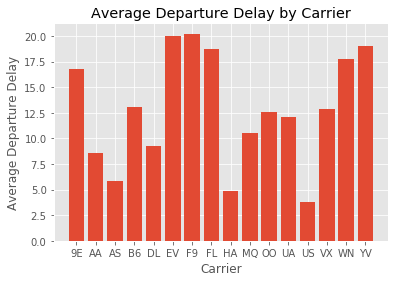

In [77]:
#Plot for Departure delay by Carrier

fig, ax = plt.subplots()
plt.bar(delay_by_carrier.carrier, dep_delay_by_carrier.dep_delay)
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay')
plt.title('Average Departure Delay by Carrier')
plt.show()

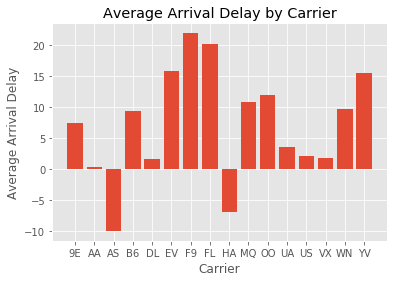

In [78]:
#Plot for Arrival delay by Carrier

fig, ax = plt.subplots()
plt.bar(delay_by_carrier.carrier, dep_delay_by_carrier.arr_delay)
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Carrier')
plt.show()

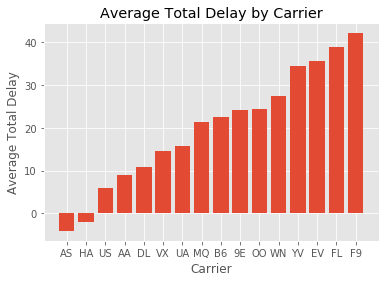

In [82]:
#Plot for Total delay by Carrier
#Sort the values by Total delay
delay_by_carrier=delay_by_carrier.sort_values('tot_delay',ascending = True)
fig, ax = plt.subplots()
plt.bar(delay_by_carrier.carrier, delay_by_carrier.tot_delay)
plt.xlabel('Carrier')
plt.ylabel('Average Total Delay')
plt.title('Average Total Delay by Carrier')
plt.show()

### From the plots, it is clear that Alaska Airlines, Hawaiian and US airlines are the best 3 airlines in terms of delays.

## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [84]:
# Read the dataset
weather_df= pd.read_csv(r'C:\Users\Amit Manghwani\Desktop\IMT 574\Problem sets/weather.csv.bz2')

In [87]:

print(weather_df.shape)
print(weather_df.columns)
print(weather_df.dtypes)
weather_df.count()

(8719, 15)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object


Unnamed: 0    8719
origin        8719
year          8719
month         8718
day           8718
hour          8718
temp          8718
dewp          8718
humid         8718
wind_dir      8486
wind_speed    8718
wind_gust     8718
precip        8719
pressure      7780
visib         8719
dtype: int64

In [88]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [97]:
weather_df.head()
weather_df = pd.DataFrame(weather_df.groupby(['year','month','day','origin']).mean()) # Grouping and aggregating data 
weather_df.reset_index(level = 0, inplace = True) # Getting rid of the grouped indices
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)

# We are concerned only about the useful columns
weather_df =  pd.DataFrame(weather_df[['origin','year','month','day','temp','dewp','humid','wind_dir',
                                       'wind_speed','wind_gust','precip','pressure','visib']]) 
#weather_df.head()

#To merge both the datasets, the lowest grain for both of them should be same to maintain consistency.   
flights_df = flights_df.groupby(['year','month','day','origin']).mean()
flights_df.reset_index(level = 0, inplace = True)
flights_df.reset_index(level = 0, inplace = True)
flights_df.reset_index(level = 0, inplace = True)
flights_df.reset_index(level = 0, inplace = True)

flights_weather = pd.merge(flights_df, weather_df, on=['year','month','day','origin'], how='inner')
flights_weather['precip'] = flights_weather['precip'] * 1000000;
print(flights_weather.head())




  origin  day  month  year   Unnamed: 0     dep_time  dep_delay     arr_time  \
0    EWR    1      1  2013   431.849180  1407.332237  17.483553  1568.815182   
1    EWR    2      1  2013  1313.745714  1345.773256  25.322674  1514.172012   
2    EWR    3      1  2013  2233.696429  1343.669670   8.450450  1542.600601   
3    EWR    4      1  2013  3149.581121  1336.442136  12.103858  1504.557864   
4    EWR    5      1  2013  3961.735294  1295.489451   5.696203  1500.594937   

   arr_delay       flight  ...       minute     temp       dewp      humid  \
0  20.886667  2276.868852  ...    29.371711  38.4800  25.050435  58.386087   
1  25.439883  2389.082857  ...    30.656977  28.8350  11.382500  47.786250   
2   6.102719  2350.369048  ...    30.456456  29.4575  14.780000  54.395833   
3   1.768546  2388.061947  ...    29.023739  33.4775  19.205000  55.880417   
4  -1.367089  2065.399160  ...    31.354430  36.7325  19.242500  49.284583   

     wind_dir  wind_speed  wind_gust  precip     p

Text(0.5,1,'Pressure vs Departure Delay')

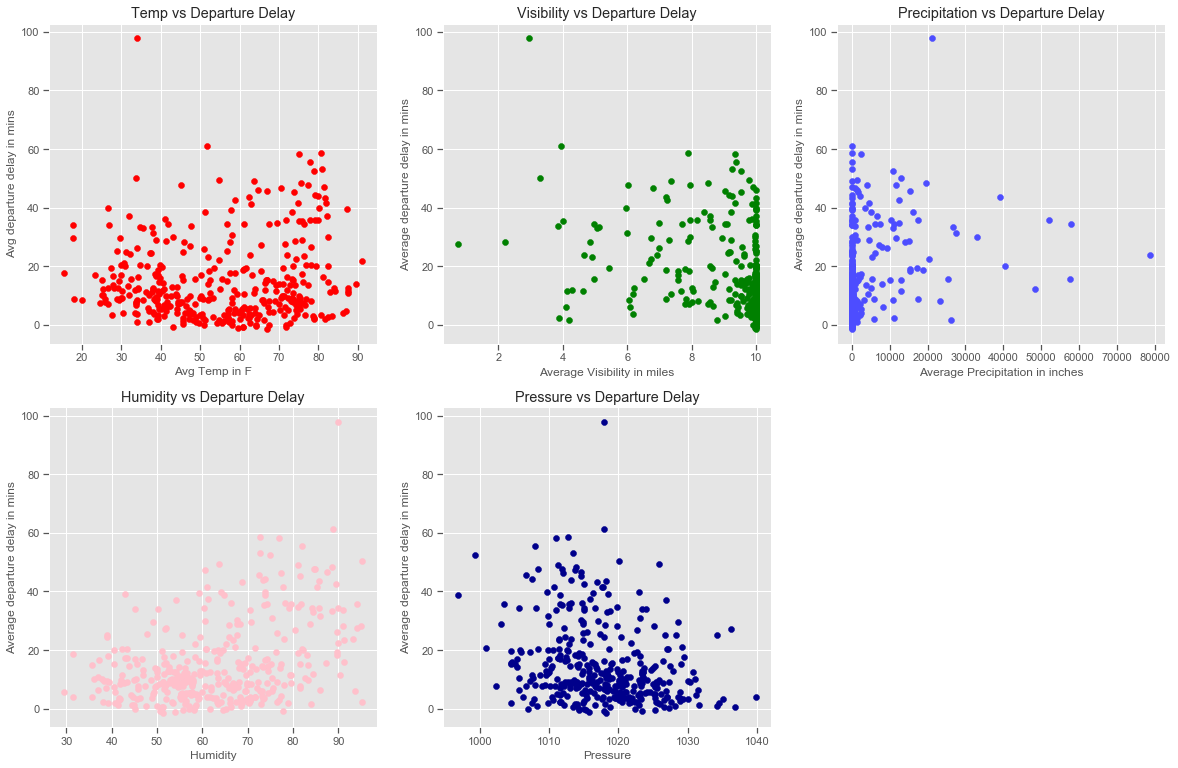

In [143]:
#Some exploratory analysis

matplotlib.style.use('ggplot')

rcParams['figure.figsize'] = 20, 20
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax1.scatter(flights_weather['temp'], flights_weather['dep_delay'], c= 'red')
xlabel('Avg Temp in F')
ylabel('Avg departure delay in mins')
title('Temp vs Departure Delay')

ax2 = fig.add_subplot(332)
ax2.scatter(flights_weather['visib'], flights_weather['dep_delay'], c='green')
xlabel('Average Visibility in miles')
ylabel('Average departure delay in mins')
title('Visibility vs Departure Delay')

ax3 = fig.add_subplot(333)
ax3.scatter(flights_weather['precip'], flights_weather['dep_delay'], c= '#4d4dff')
xlabel('Average Precipitation in inches')
ylabel('Average departure delay in mins')
title('Precipitation vs Departure Delay')

ax4 = fig.add_subplot(334)
ax4.scatter(flights_weather['humid'], flights_weather['dep_delay'], c = 'pink')
xlabel('Humidity')
ylabel('Average departure delay in mins')
title('Humidity vs Departure Delay')

ax5 = fig.add_subplot(335)
ax5.scatter(flights_weather['pressure'], flights_weather['dep_delay'], c = 'darkblue')
xlabel('Pressure')
ylabel('Average departure delay in mins')
title('Pressure vs Departure Delay')

### From the plots, it seems that temperature and humidity has some relation with the departure delays. As temperature and humidity increase, the delay increase. If we calculate the interaction of these parameters or do a multivariate regression, then we might be able to have a concrete conclusion.  